In [2]:
# Comparing RO to INS data

import sys
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts")
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts/config")
from figs import plot
import motion

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

import module
import settings

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# text
plt.rc("text", usetex=True)
plt.rc("font", family=settings.FONT_FAMILY)

module.set_sys_paths()

from mrg.logging import MonolithicDecoder
from mrg.adaptors.transform import PbSerialisedTransformToPython
from mrg.transform.conversions import se3_to_components, build_se3_transform

import numpy as np
from config.data import *

In [159]:
INS_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic"
RO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/standard-ro/radar_motion_estimation.monolithic"
ERO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/enhanced-ro/radar_motion_estimation.monolithic"

# INS_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic"
# RO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/standard-ro/radar_motion_estimation.monolithic"
# ERO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/enhanced-ro/radar_motion_estimation.monolithic"
# ERO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/ground-truth/radar_motion_estimation.monolithic"

# INS_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-07-27-15-35-23-long-hanbourgh-to-ori/motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic"
# RO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-07-27-15-35-23-long-hanbourgh-to-ori/motion_estimation/standard-ro/radar_motion_estimation.monolithic"
# ERO_relative_poses_path = "/Users/roberto/data/odometry-comparisons/rugged_ro/2018-07-27-15-35-23-long-hanbourgh-to-ori/motion_estimation/enhanced-ro/radar_motion_estimation.monolithic"


# INS - open monolithic and iterate frames
print("reading INS_relative_poses_path: " + INS_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    INS_relative_poses_path)

# iterate mono
INS_se3s = []
INS_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    INS_se3s.append(serialised_transform[0])
    INS_timestamps.append(serialised_transform[1])
    
# RO - open monolithic and iterate frames
print("reading RO_relative_poses_path: " + RO_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    RO_relative_poses_path)

# iterate mono
RO_se3s = []
RO_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    RO_se3s.append(serialised_transform[0])
    RO_timestamps.append(serialised_transform[1])
    
# ERO - open monolithic and iterate frames
print("reading ERO_relative_poses_path: " + ERO_relative_poses_path)
monolithic_decoder = MonolithicDecoder(
    ERO_relative_poses_path)
# iterate mono
ERO_se3s = []
ERO_timestamps = []
for pb_serialised_transform, _, _ in monolithic_decoder:
    # adapt
    serialised_transform = PbSerialisedTransformToPython(
        pb_serialised_transform)
    ERO_se3s.append(serialised_transform[0])
    ERO_timestamps.append(serialised_transform[1])

reading INS_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/ground-truth/flattened_novatel_generated_poses.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading RO_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/standard-ro/radar_motion_estimation.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2
reading ERO_relative_poses_path: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-16-24-39-long-hanborough-to-ori-V4-radar-leopon-trial-sunny-long-range/motion_estimation/enhanced-ro/radar_motion_estimation.monolithic
importing  protobuf.transform.pbSerialisedTransform_pb2


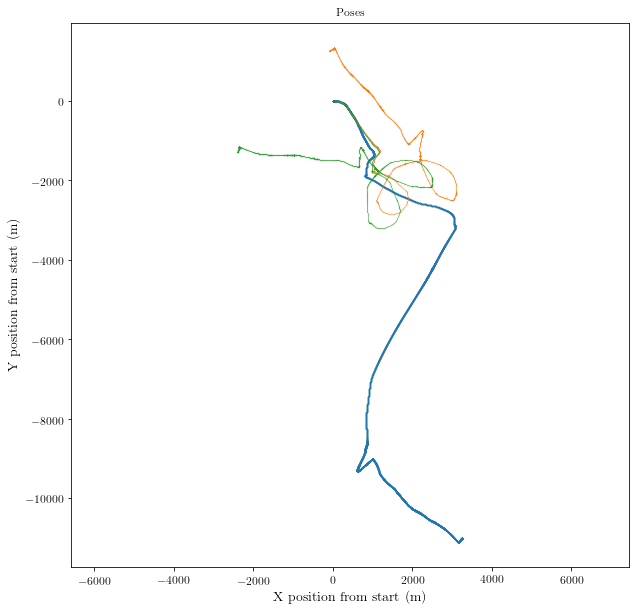

In [160]:
# get INS poses
INS_poses = []
pose = np.identity(4)
for i in range(len(INS_se3s)):
    pose = pose * INS_se3s[i]
    INS_poses.append(pose)

# get x,y coords
x_INS = [pose[0, 3] for pose in INS_poses]
y_INS = [pose[1, 3] for pose in INS_poses]

# get RO poses
RO_poses = []
pose = np.identity(4)
for i in range(len(RO_se3s)):
    pose = pose * RO_se3s[i]
    RO_poses.append(pose)

# get x,y coords
x_RO = [pose[0, 3] for pose in RO_poses]
y_RO = [pose[1, 3] for pose in RO_poses]

# get ERO poses
ERO_poses = []
pose = np.identity(4)
for i in range(len(ERO_se3s)):
    pose = pose * ERO_se3s[i]
    ERO_poses.append(pose)

# get x,y coords
x_ERO = [pose[0, 3] for pose in ERO_poses]
y_ERO = [pose[1, 3] for pose in ERO_poses]

plt.figure(figsize=(10,10))
plt.plot(x_INS,y_INS,'.',markersize=0.1);
plt.plot(x_RO,y_RO,'.',markersize=0.1);
plt.plot(x_ERO,y_ERO,'.',markersize=0.1);
plt.axis('equal');
plt.title('Poses');
plt.xlabel('X position from start (m)');
plt.ylabel('Y position from start (m)');

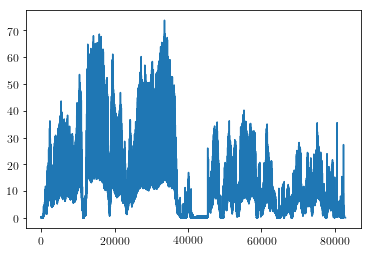

In [161]:
# get INS speeds
assert len(INS_se3s) == len(INS_timestamps)
INS_speeds = []
INS_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(INS_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = INS_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - INS_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = INS_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    INS_speeds.append(speed)
    INS_TIMESTAMPS.append(INS_timestamps[i])
plt.plot(INS_speeds);

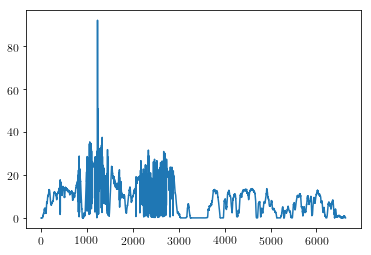

In [162]:
# get speeds
assert len(RO_se3s) == len(RO_timestamps)
RO_speeds = []
RO_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(RO_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = RO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - RO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = RO_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    RO_speeds.append(speed)
    RO_TIMESTAMPS.append(RO_timestamps[i])
plt.plot(RO_speeds);

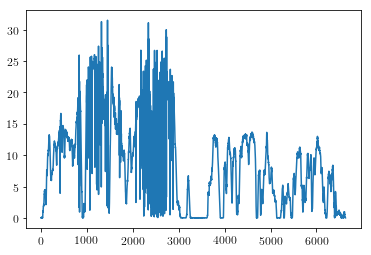

In [163]:
# get speeds
assert len(ERO_se3s) == len(ERO_timestamps)
ERO_speeds = []
ERO_TIMESTAMPS = []
deltatime_arr = []
for i in range(len(ERO_timestamps) - 1):
# for i in range(0,len(timestamps) - 1,10): # this fixed the glitches by skipping them
# for i in range(1000,2000):
    # work out speed
    delta_time = ERO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION \
        - ERO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    deltatime_arr.append(delta_time)
    se3 = ERO_se3s[i]
    translation = se3[0:2, -1]
    incremental_distance = np.linalg.norm(translation)
    speed = incremental_distance / delta_time
    ERO_speeds.append(speed)
    ERO_TIMESTAMPS.append(ERO_timestamps[i])
plt.plot(ERO_speeds);

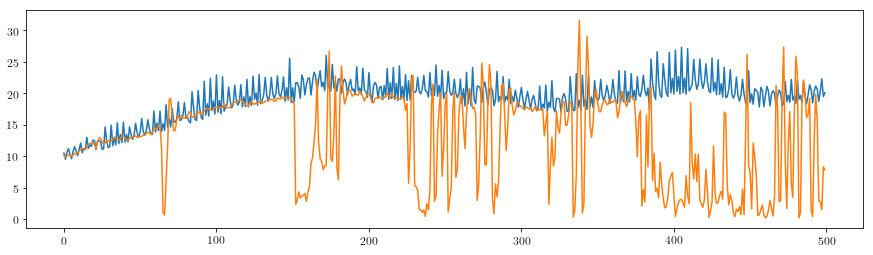

In [164]:
# Do interpolation (accumulatation for now)
interp_INS_speed = []
distance = 0
temp_speed = 0
j = 0
for i in range(len(RO_timestamps)):
    while(INS_timestamps[j] < RO_timestamps[i]):
        distance += INS_speeds[j]*(INS_timestamps[j]-INS_timestamps[j-1])
        j+=1
    temp_speed = distance/(RO_timestamps[i]-RO_timestamps[i-1])
    interp_INS_speed.append(temp_speed)
    distance = 0
plt.figure(figsize=(15,4))
plt.plot(interp_INS_speed[2000:2500])
plt.plot(RO_speeds[2000:2500])

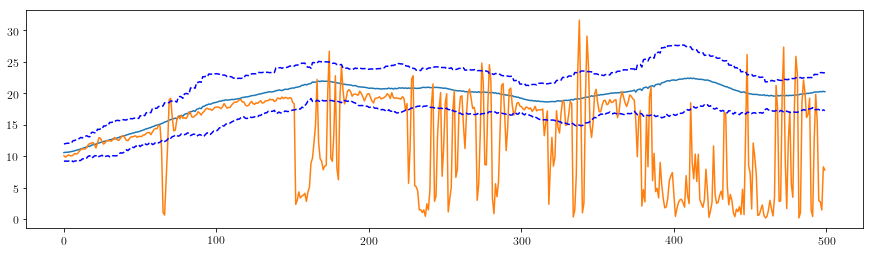

In [165]:
window_size = 20
std_devs = []
means = []
n_sigmas = 2
for i in range(window_size//2,len(interp_INS_speed)-window_size//2):
    window_contents = interp_INS_speed[i-window_size//2:i+window_size//2]
    std_devs.append(std(window_contents))
    means.append(mean(window_contents))
    
means = np.array(means)
means[-window_size//2:] = 0
means = np.roll(means,window_size//2)

std_devs = np.array(std_devs)
std_devs[-window_size//2:] = 0
std_devs = np.roll(std_devs,window_size//2)

plt.figure(figsize=(15,4))
plt.plot(means[2000:2500])
plt.plot(RO_speeds[2000:2500])
plt.plot(means[2000:2500]+n_sigmas*std_devs[2000:2500],'b--')
plt.plot(means[2000:2500]-n_sigmas*std_devs[2000:2500],'b--')
# plt.plot(means[2000:2500])
# plt.plot(RO_speeds[2005:2505])
# plt.plot(means[2000:2500]+n_sigmas*std_devs[2000:2500],'b--')
# plt.plot(means[2000:2500]-n_sigmas*std_devs[2000:2500],'b--')

(-5, 100)

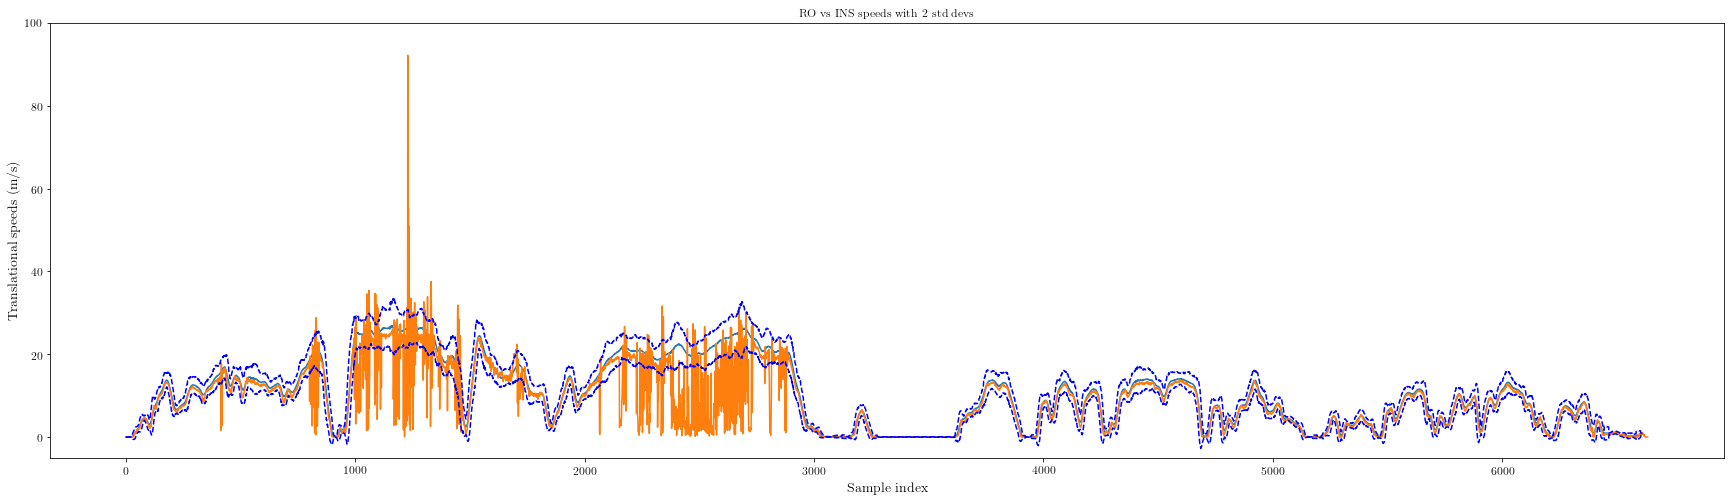

In [166]:
plt.figure(figsize=(30,8))
plt.title('RO vs INS speeds with 2 std devs')
plt.ylabel('Translational speeds (m/s)')
plt.xlabel('Sample index')
plt.plot(means)
plt.plot(RO_speeds)
plt.plot(means+n_sigmas*std_devs,'b--')
plt.plot(means-n_sigmas*std_devs,'b--')
# plt.plot(means+3*std_devs,'k--')
# plt.plot(means-3*std_devs,'k--')
plt.ylim(-5,100)

In [167]:
# Checking for failures based on speeds (not accelerations)
m = len(means)
upper_thresh = means + n_sigmas*std_devs
lower_thresh = means - n_sigmas*std_devs
minimum_speed_to_label = 0.5
label_reach_back = 0
classification = ones(m)*-1
for i in range(m):
    if(RO_speeds[i] < lower_thresh[i]) or RO_speeds[i] > upper_thresh[i]:
        if(means[i] > minimum_speed_to_label):
            classification[i-label_reach_back:i+1] = 1;
#     else:
#         classification[i+window_size//2,] = -1;

In [168]:
tmp_arr = ones(10)
rb = 1
tmp_arr[3-rb:3+1] = 9
print(tmp_arr)

[1. 1. 9. 9. 1. 1. 1. 1. 1. 1.]


Detected failures: 695 of 6616 samples


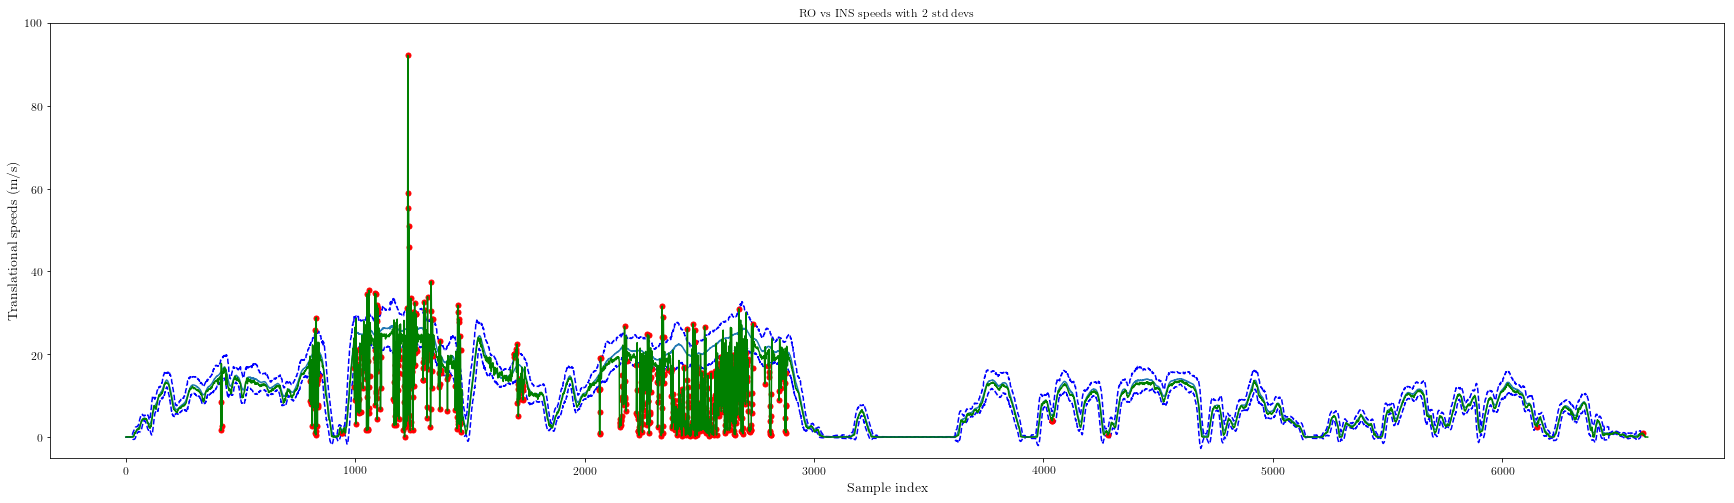

In [169]:
plt.figure(figsize=(30,8))
plt.title('RO vs INS speeds with 2 std devs')
plt.ylabel('Translational speeds (m/s)')
plt.xlabel('Sample index')
plt.plot(means)
plt.plot(means+n_sigmas*std_devs,'b--')
plt.plot(means-n_sigmas*std_devs,'b--')
for i in range(m):
    if(classification[i] == 1):
        plt.plot(i,RO_speeds[i],'r.-',markersize=10)
#     else:
plt.plot(RO_speeds,'g-',markersize=0.5) 
plt.ylim(-5,100)

tally = 0;
for i in range(m):
    if(classification[i] == 1):
        tally+=1
print('Detected failures:',tally,"of",m,'samples')

In [170]:
plot_poses = False
if(plot_poses == True):
    plt.figure(figsize=(10,10))
    for i in range(m):
        if(classification[i] == 1):
            plt.plot(x_RO[i],y_RO[i],'r.',markersize=2);
        else:
            plt.plot(x_RO[i],y_RO[i],'b.',markersize=0.5);

    plt.axis('equal');
    plt.title('Poses where RO has failure (red) and been within the INS threshold (blue)');
    plt.xlabel('X position from start (m)');
    plt.ylabel('Y position from start (m)');

In [171]:
# Get error indices
labels = [] #zeros(len(EVec_timestamps))
for i in range(m):
    if(classification[i] == 1):
        labels.append(1)
    else:
        labels.append(-1)
print(size(labels))

6616


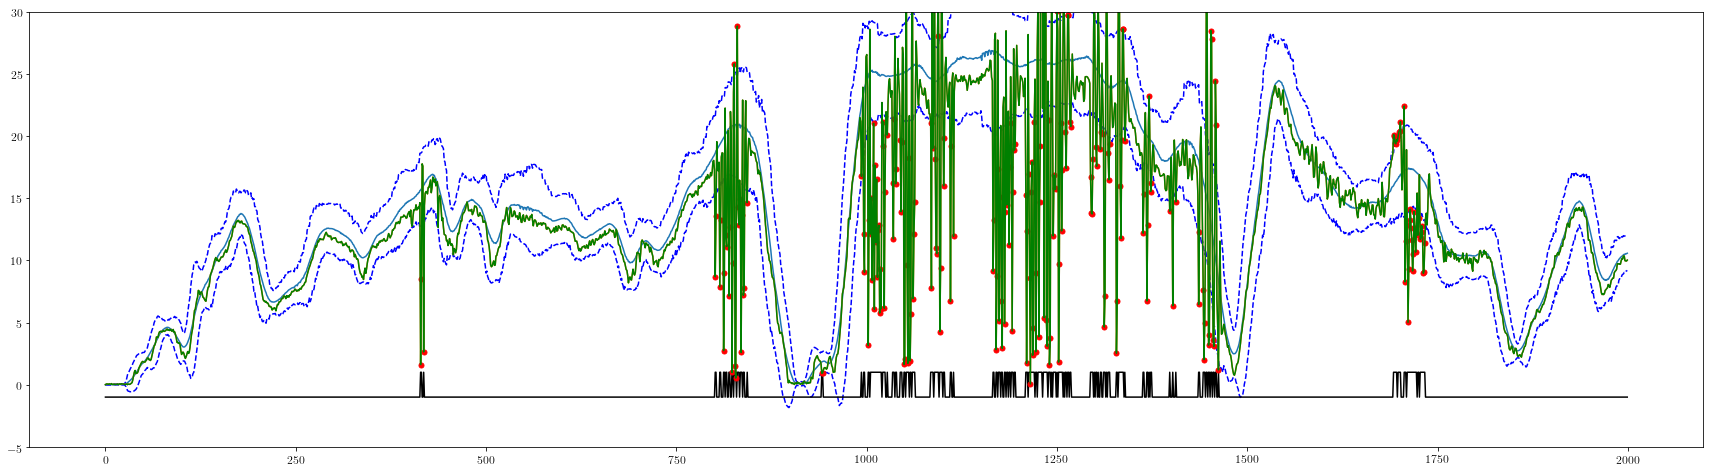

In [172]:
start = 0
finish = 2000
plt.figure(figsize=(30,8))
plt.plot(means[start:finish])
plt.plot(means[start:finish]+n_sigmas*std_devs[start:finish],'b--')
plt.plot(means[start:finish]-n_sigmas*std_devs[start:finish],'b--')
plt.plot(RO_speeds[start:finish]);
plt.plot(labels[start:finish],'k');
for i in range(start,finish):
    if(labels[i] == 1):
        plt.plot(i-start,RO_speeds[i],'r.-',markersize=10)
#     else:
plt.plot(RO_speeds[start:finish],'g-',markersize=0.5)
plt.ylim(-5,30);

In [173]:
print('Instances of RO failure detection')

tally = 0;
for i in range(start,finish):
    if(labels[i] == 1):
        tally+=1
print('Detected failures:',tally,"of",finish-start,'samples')
        

Instances of RO failure detection
Detected failures: 247 of 2000 samples


Detected failures: 695 of 6616 samples
Detected failures: 717 of 6616 samples


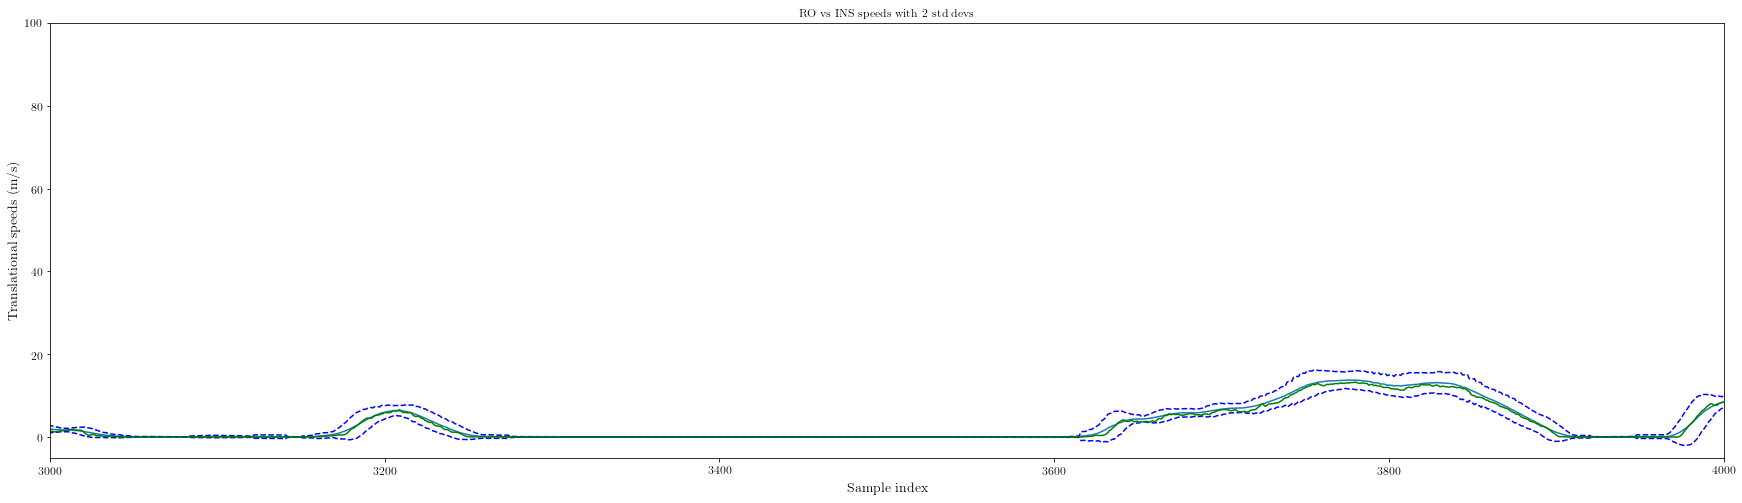

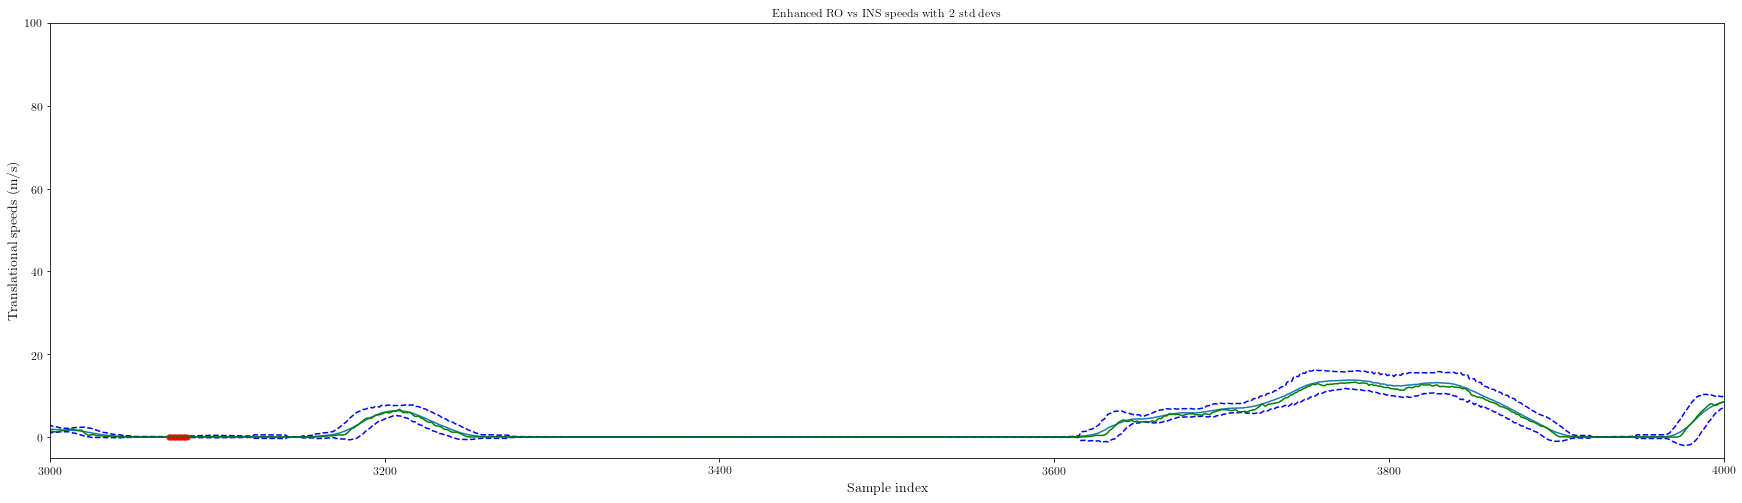

In [174]:
x_start = 3000
x_finish = 4000
plt.figure(figsize=(30,8))
plt.title('RO vs INS speeds with 2 std devs')
plt.ylabel('Translational speeds (m/s)')
plt.xlabel('Sample index')
plt.plot(means)
plt.plot(means+n_sigmas*std_devs,'b--')
plt.plot(means-n_sigmas*std_devs,'b--')
for i in range(m):
    if(classification[i] == 1):
        plt.plot(i,RO_speeds[i],'r.-',markersize=10)
#     else:
plt.plot(RO_speeds,'g-',markersize=0.5) 
plt.ylim(-5,100)
plt.xlim(x_start,x_finish)

tally = 0;
for i in range(m):
    if(classification[i] == 1):
        tally+=1
print('Detected failures:',tally,"of",m,'samples')

plt.figure(figsize=(30,8))
plt.title('Enhanced RO vs INS speeds with 2 std devs')
plt.ylabel('Translational speeds (m/s)')
plt.xlabel('Sample index')
plt.plot(means)
plt.plot(means+n_sigmas*std_devs,'b--')
plt.plot(means-n_sigmas*std_devs,'b--')

# m = len(ERO_TIMESTAMPS)
ERO_classification = ones(m)*-1
for i in range(m-1):
    if(ERO_speeds[i] < lower_thresh[i]) or ERO_speeds[i] > upper_thresh[i] and ERO_speeds[i] > minimum_speed_to_label:
        ERO_classification[i] = 1;

for i in range(m):
    if(ERO_classification[i] == 1):
        plt.plot(i,ERO_speeds[i],'r.-',markersize=10)
for i in range(m):
    if(classification[i] == 1 and ERO_classification[i] == -1):
        plt.plot(i,ERO_speeds[i],'.-',color=[0,1,0],markersize=15)
plt.plot(ERO_speeds,'g-',markersize=0.5) 
plt.ylim(-5,100)    
plt.xlim(x_start,x_finish)
    
tally = 0;
for i in range(m):
    if(ERO_classification[i] == 1):
        tally+=1
print('Detected failures:',tally,"of",m,'samples')

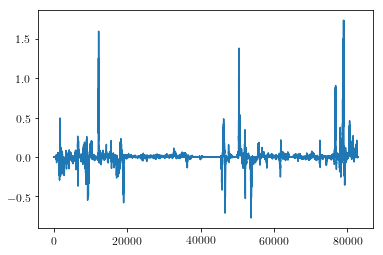

In [175]:
# INS yaw rates
assert len(INS_se3s) == len(INS_timestamps)
INS_yaw_rates = []
INS_TIMESTAMPS = []
for i in range(len(INS_timestamps) - 1):
    # work out yaw_rate
    delta_time = INS_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION  \
        - INS_timestamps[i] / settings.TIMESTAMP_CONVERSION
    se3 = INS_se3s[i]
    xyzrpy = se3_to_components(se3)
    yaw_rate = xyzrpy[-1] / delta_time
    INS_yaw_rates.append(yaw_rate)
    INS_TIMESTAMPS.append(INS_timestamps[i])
plt.plot(INS_yaw_rates)

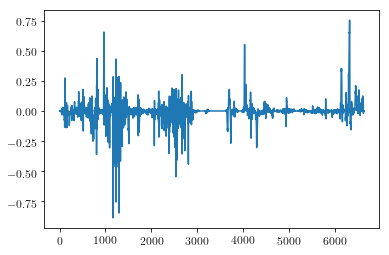

In [176]:
# RO yaw rates
assert len(RO_se3s) == len(RO_timestamps)
RO_yaw_rates = []
RO_TIMESTAMPS = []
for i in range(len(RO_timestamps) - 1):
    # work out yaw_rate
    delta_time = RO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION  \
        - RO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    se3 = RO_se3s[i]
    xyzrpy = se3_to_components(se3)
    yaw_rate = xyzrpy[-1] / delta_time
    RO_yaw_rates.append(yaw_rate)
    RO_TIMESTAMPS.append(RO_timestamps[i])
plt.plot(RO_yaw_rates)

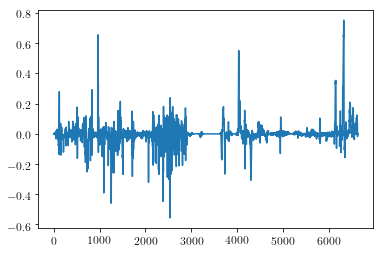

In [177]:
# ERO yaw rates
assert len(ERO_se3s) == len(ERO_timestamps)
ERO_yaw_rates = []
ERO_TIMESTAMPS = []
for i in range(len(ERO_timestamps) - 1):
    # work out yaw_rate
    delta_time = ERO_timestamps[i + 1] / settings.TIMESTAMP_CONVERSION  \
        - ERO_timestamps[i] / settings.TIMESTAMP_CONVERSION
    se3 = ERO_se3s[i]
    xyzrpy = se3_to_components(se3)
    yaw_rate = xyzrpy[-1] / delta_time
    ERO_yaw_rates.append(yaw_rate)
    ERO_TIMESTAMPS.append(ERO_timestamps[i])
plt.plot(ERO_yaw_rates)

(-2, 2)

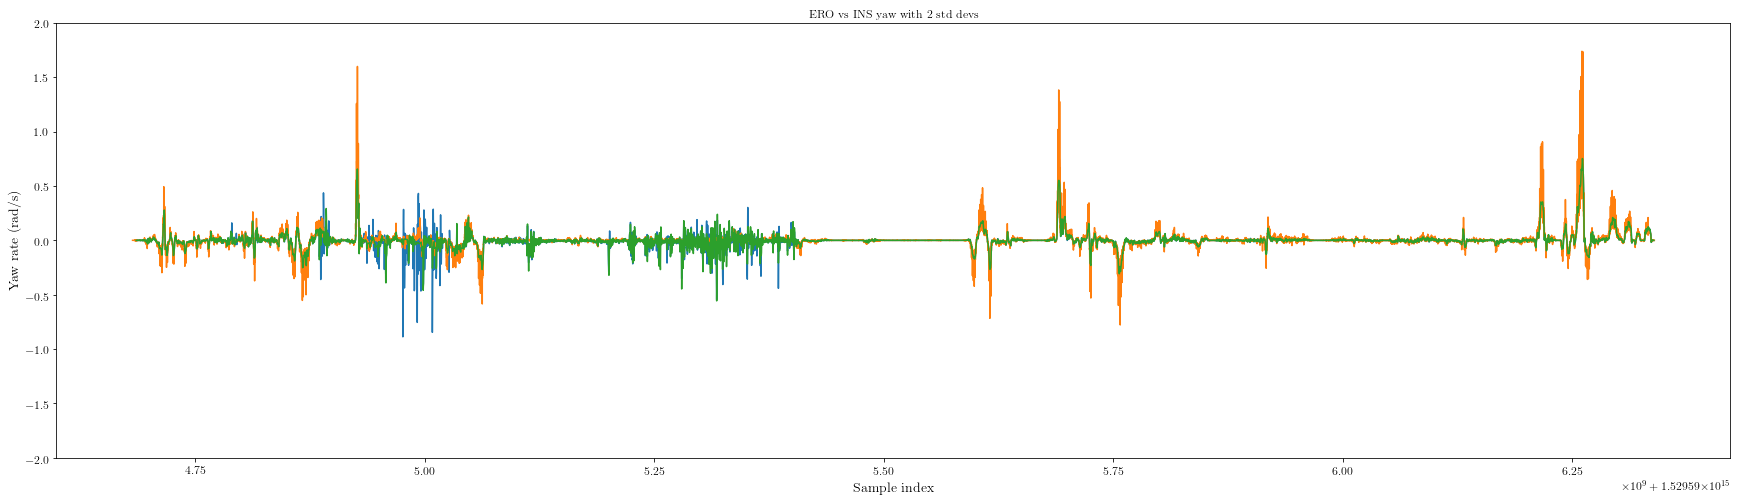

In [178]:
plt.figure(figsize=(30,8))
plt.title('ERO vs INS yaw with 2 std devs')
plt.ylabel('Yaw rate (rad/s)')
plt.xlabel('Sample index')
plt.plot(RO_TIMESTAMPS,RO_yaw_rates,markersize=0.1)
plt.plot(INS_TIMESTAMPS,INS_yaw_rates)
# for i in range(m):
#     if(ERO_classification[i] == 1):
#         plt.plot(i,ERO_yaw_rates[i],'r.-',markersize=10)
plt.plot(ERO_TIMESTAMPS,ERO_yaw_rates)
plt.ylim(-2,2)

In [210]:
A = lambda dt: np.array([[0,0,0,dt,0,0], 
                         [0,0,0,0,dt,0],
                         [0,0,0,0,0,dt], 
                         [0,0,0,1,0, 0],
                         [0,0,0,0,1, 0],
                         [0,0,0,0,0, 1]])
C = lambda x: np.array([[np.cos(x[2]),-np.sin(x[2]),0,0,0,0],
                        [np.sin(x[2]),np.cos(x[2]),0,0,0,0],
                        [0,0,1,0,0,0]])
R = np.eye(6,6) * 2.5
Q = np.eye(3,3)
E = np.zeros([6,6])

Y = lambda i: np.array([RO_poses[i][0, 3],
                        RO_poses[i][1, 3],
                        math.atan2(RO_poses[i][1,0], RO_poses[i][0,0])])

t = len(RO_timestamps)
X = np.array([0,0,0,0,0,0]).T
X_outputs = []
for i in range(1,t):
    oldX = X
    y = Y(i) - Y(i-1)
    dt = (RO_timestamps[i] - RO_timestamps[i-1])*1e-6
    
    X = np.matmul(A(dt),X)
    E = np.matmul(np.matmul(A(dt),E),A(dt).T) + R
    
    if(i > window_size and i < (window_size + len(labels) -1)):
        if(labels[i - window_size] == -1):
            k_1 = np.matmul(E,C(oldX).T)
            k_2 = np.matmul(np.matmul(C(oldX),E),C(oldX).T) + Q
            K = np.matmul(k_1,np.linalg.pinv(k_2))
            X2 = X + np.matmul(K,y - np.matmul(C(oldX),X))
            E2 = np.matmul(np.eye(6,6) - np.matmul(K,C(oldX)),E)
            
            m = X - X2
            v = np.matmul(m.T,np.matmul(np.linalg.pinv(E2 - E), m))
            if(abs(v) < 1.5):
                X = X2
                E = E2
    X_outputs.append(X)

6635


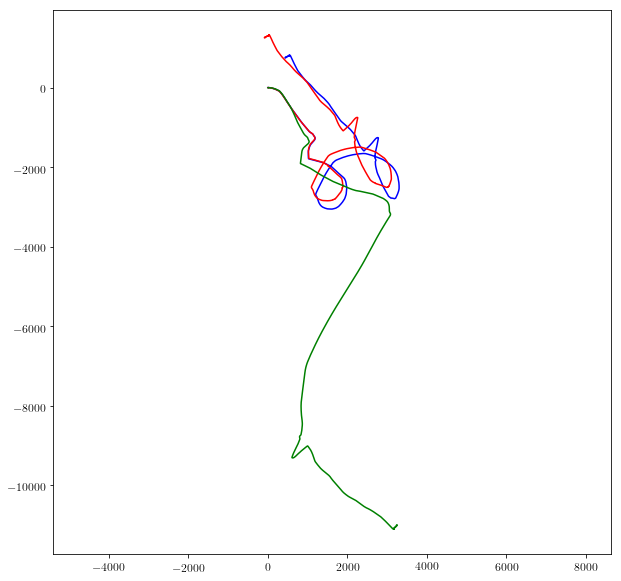

In [211]:
plt.figure(figsize=(10,10))
x = [x[0] for x in X_outputs]
y = [y[1] for y in X_outputs]
x_total = [0]
y_total = [0]

print(len(x))

for i in range(1,t-1):
    x_total.append(x_total[i-1]+x[i])
    y_total.append(y_total[i-1]+y[i])

plt.plot(x_total,y_total,'b')
plt.plot(x_RO,y_RO,'r')
plt.plot(x_INS,y_INS,'g')
plt.axis('equal');

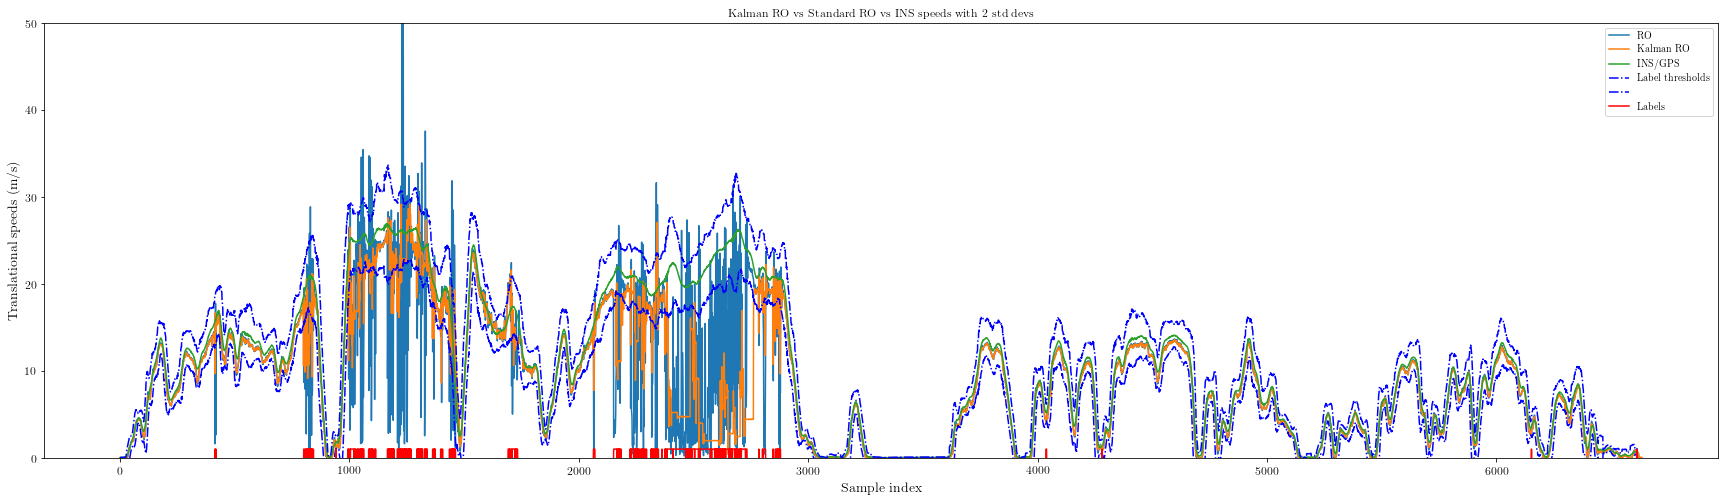

In [219]:
kalman_speeds = 4*np.sqrt(np.array([o**2 for o in x]) + np.array([o**2 for o in y]))
plt.figure(figsize=(30,8))
plt.plot(RO_speeds)
plt.plot(kalman_speeds)
plt.plot(means)
plt.plot(lower_thresh,'b-.')
plt.plot(upper_thresh,'b-.')
plt.plot(labels,'r')


plt.ylim(0,50)
# plt.xlim(400,3500)
plt.title('Kalman RO vs Standard RO vs INS speeds with 2 std devs')
plt.ylabel('Translational speeds (m/s)')
plt.xlabel('Sample index')
plt.legend(['RO','Kalman RO','INS/GPS','Label thresholds','','Labels'])
num_fails = 0
for i in range(1,len(kalman_speeds)-20):
    if kalman_speeds[i] < lower_thresh[i] or kalman_speeds[i] > upper_thresh[i] and kalman_speeds[i] > minimum_speed_to_label:
        num_fails += 1
# print("Number of failures from Kalman: ", num_fails)